1. Зниження розмірності і візуалізація даних  
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.  
Приклад: https://github.com/natsakh/Data-Analysis/tree/main/Pr_3  
https://www.youtube.com/watch?v=YYhiOcBqadE  

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Отримання датасетута його нормалізація

In [46]:
data_path = '../japanese+credit+screening/crx.data'
df = pd.read_csv(data_path, header=None)
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

Виконання зниження розмірновтсі та візуалізація результатів:

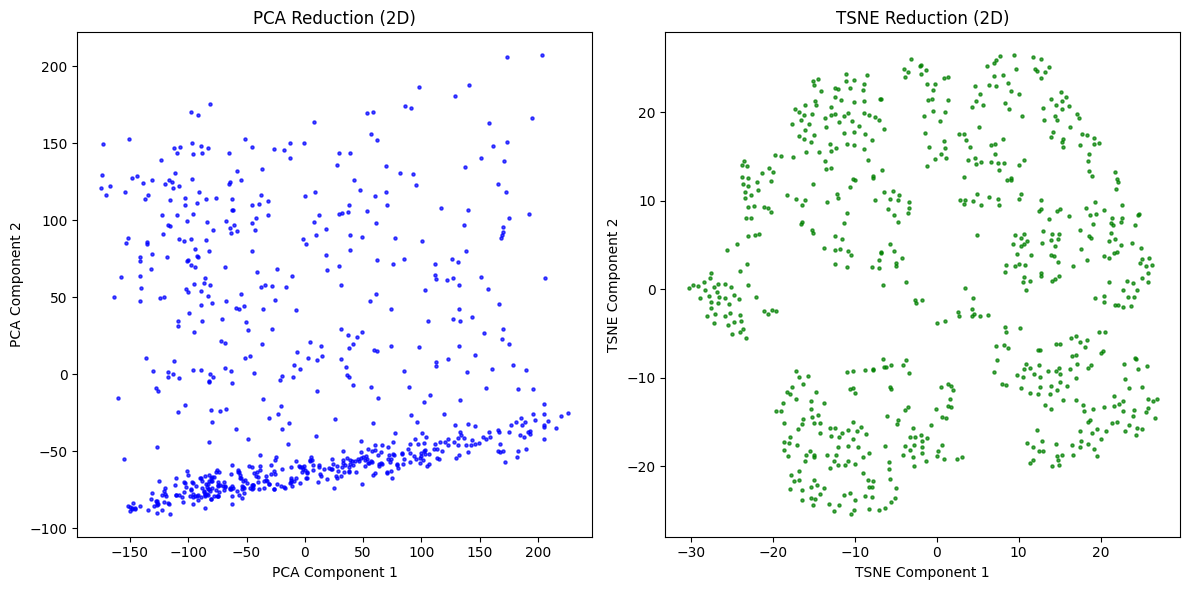

In [47]:
# PCA
pca = PCA(n_components=2,random_state=2)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', s=5, alpha=0.7)
plt.title('PCA Reduction (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# TSNE 
tsne = TSNE(n_components=2, random_state=2)
tsne_result = tsne.fit_transform(df)

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='green', s=5, alpha=0.7)
plt.title('TSNE Reduction (2D)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.tight_layout()

plt.show()

2. Кластерний аналіз  
1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.  
Приклад: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html  
https://www.youtube.com/watch?v=AwyRX_vK9NQ  


In [48]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Завантаження зображення та переведення його у RGB масив:

In [49]:
image_path = './photo.jpeg'
image = Image.open(image_path)
image_np = np.array(image)

Виконання квантування та виведення результатів:

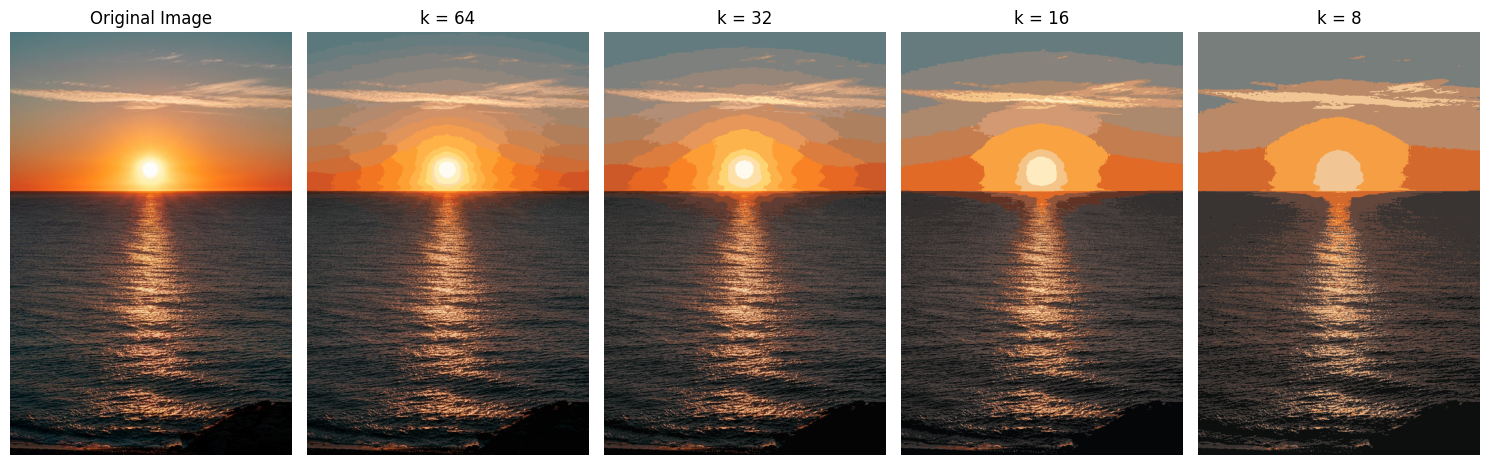

In [50]:
def kmeans_quantization(image_np, k):
    pixels = image_np.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    quantized_image = centers[labels].reshape(image_np.shape).astype(np.uint8)
    return quantized_image

color_depths = [64, 32, 16, 8]
quantized_images = [kmeans_quantization(image_np, k) for k in color_depths]

plt.figure(figsize=(15, 10))
plt.subplot(1, len(color_depths) + 1, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis('off')

for i, (quantized_image, k) in enumerate(zip(quantized_images, color_depths), start=2):
    plt.subplot(1, len(color_depths) + 1, i)
    plt.imshow(quantized_image)
    plt.title(f"k = {k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Обробка та класифікація текстових даних  
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості.  
Приклад: https://github.com/natsakh/Data-Analysis/tree/main/Pr_4  
https://www.youtube.com/watch?v=ntUBT8iC81k  


In [51]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Завнаження датасету, очиска даних від стоп слів, пунктуації.

In [52]:
data_path = './FakeNewsNet.csv'
data = pd.read_csv(data_path)
data = data[['title', 'real']].dropna()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\S+", " ", text)
    text = re.sub(r"http*\S+", " ", text)
    text = re.sub(r"#\S+", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_title'] = data['title'].apply(clean_text)

Створення wordcloud, векторизація та класифікація даних.

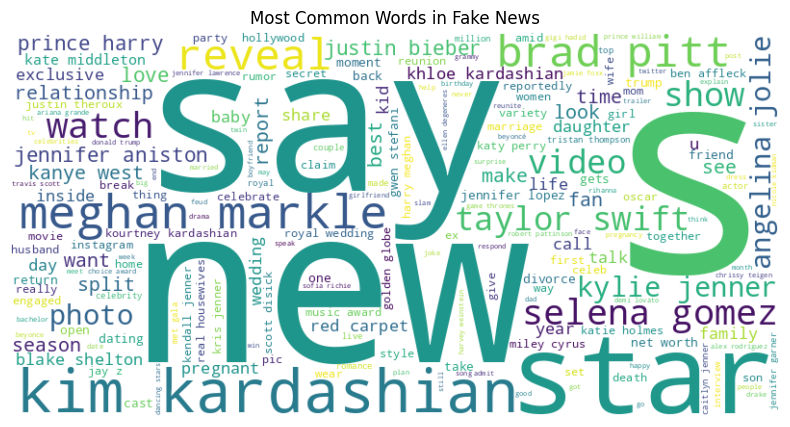

Accuracy: 0.8379077453657134
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.46      0.59      1744
           1       0.84      0.96      0.90      5215

    accuracy                           0.84      6959
   macro avg       0.83      0.71      0.74      6959
weighted avg       0.83      0.84      0.82      6959



In [53]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

data_line = ' '.join(data['cleaned_title'])
plot_wordcloud(data_line, "Most Common Words in Fake News")

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_title'])
y = data['real']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))